In [23]:
import cv2
import glob
import numpy as np
from resizeimage import resizeimage

image_list = []
for filename in glob.glob('../GTSRB/Final_Training/Images/00014/*.ppm'): #assuming gif
    imgrgb = cv2.imread(filename, 1)
    imgrgb = cv2.resize(imgrgb, dsize=(32, 32), interpolation=cv2.INTER_NEAREST)
    try:
        image_list.append(imgrgb)
    except:
        pass

In [24]:
data_train = np.array(image_list)
labels_train = np.ones(len(data_train))

In [25]:
image_list_nolabel = []
for filename in glob.glob('../GTSRB/Final_Training/Images/NOLABEL/*.jpg'): #assuming gif
    try:
        imgrgb = cv2.imread(filename, 1)
        imgrgb = cv2.resize(imgrgb, dsize=(32, 32), interpolation=cv2.INTER_NEAREST)
        image_list_nolabel.append(imgrgb)
    except:
        pass

In [26]:
data_train = np.concatenate((data_train, np.array(image_list_nolabel)), axis=0)
labels_train = np.concatenate((labels_train, np.zeros(len(image_list_nolabel))))

In [27]:
data_train.shape

(1464, 32, 32, 3)

In [28]:
labels_train.shape

(1464,)

In [29]:
idx = np.random.permutation(1449)
data_train, labels_train = data_train[idx], labels_train[idx]

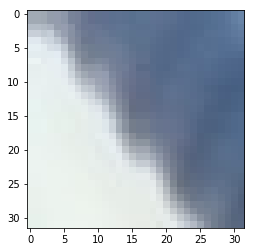

0.0


In [85]:
from matplotlib import pyplot as plt

idx = 1097

plt.imshow(data_train[idx], interpolation='nearest')
plt.show()
print(labels_train[idx])

In [86]:
from keras.models import Model
from keras.layers import Input
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.pooling import MaxPooling2D
from keras.optimizers import SGD


def cnn_model():
    inp = Input(shape=(32, 32, 3))
    x = Conv2D(32, (3, 3), padding='same', activation='relu')(inp)
    x = MaxPooling2D(pool_size=(2, 2))(x)
    x = Dropout(0.2)(x)

    x = Conv2D(64, (3, 3), padding='same', activation='relu')(x)
    x = MaxPooling2D(pool_size=(2, 2))(x)
    x = Dropout(0.2)(x)

    x = Flatten()(x)
    x = Dense(256, activation='relu')(x)
    x = Dropout(0.5)(x)
    x = Dense(2, activation='softmax')(x)
    return Model(inputs=inp, outputs=x)

In [87]:
model = cnn_model()
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 32, 32, 3)         0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 8, 8, 64)          0         
__________

In [88]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [89]:
from sklearn.preprocessing import OneHotEncoder
from keras.applications.mobilenet import preprocess_input

data_train = preprocess_input(data_train.astype(float))

In [90]:
from keras.utils import to_categorical

labels_train = to_categorical(labels_train)

In [91]:
h = model.fit(data_train[:600], labels_train[:600], epochs=20, validation_data = (data_train[600:], labels_train[600:]))

Train on 600 samples, validate on 849 samples
Epoch 1/20
600/600 [==============================] - 1s 2ms/step - loss: 0.4958 - acc: 0.7683 - val_loss: 0.2745 - val_acc: 0.9105
Epoch 2/20
600/600 [==============================] - 1s 2ms/step - loss: 0.1856 - acc: 0.9283 - val_loss: 0.1334 - val_acc: 0.9611
Epoch 3/20
600/600 [==============================] - 1s 2ms/step - loss: 0.0868 - acc: 0.9767 - val_loss: 0.0718 - val_acc: 0.9859
Epoch 4/20
600/600 [==============================] - 1s 2ms/step - loss: 0.0450 - acc: 0.9850 - val_loss: 0.0538 - val_acc: 0.9882
Epoch 5/20
600/600 [==============================] - 1s 2ms/step - loss: 0.0321 - acc: 0.9867 - val_loss: 0.1317 - val_acc: 0.9435
Epoch 6/20
600/600 [==============================] - 1s 2ms/step - loss: 0.0324 - acc: 0.9883 - val_loss: 0.0415 - val_acc: 0.9894
Epoch 7/20
600/600 [==============================] - 1s 2ms/step - loss: 0.0119 - acc: 0.9983 - val_loss: 0.0361 - val_acc: 0.9894
Epoch 8/20
600/600 [==========

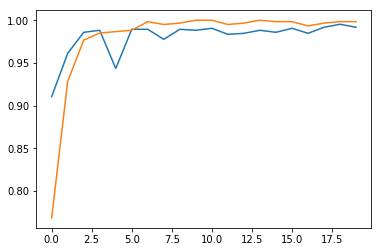

In [92]:
import matplotlib.pyplot as plt

plt.plot(h.history["val_acc"])
plt.plot(h.history["acc"])

plt.show()

In [94]:
import numpy as np
import cv2
 
offset = 3
 
img = cv2.imread('../test6.jpg', 0)
imgrgb = cv2.imread('../test6.jpg', 1)

#imgrgb = cv2.cvtColor(imgrgb, cv2.COLOR_BGR2RGB)
 
circles = cv2.HoughCircles(img, cv2.HOUGH_GRADIENT, 1.4 , 10, param1=130,param2=60,minRadius=0,maxRadius=0)

count = 0

l = []
 
if circles is not None:
  # convert the (x, y) coordinates and radius of the circles to integers
  circles = np.round(circles[0, :]).astype("int")
 
  # loop over the (x, y) coordinates and radius of the circles
  for (x, y, r) in circles:
    if r > 50:
      continue
    # draw the circle in the output image, then draw a rectangle
    # corresponding to the center of the circle
 
    crop_img = imgrgb[y-r-offset:y+r+offset, x-r-offset:x+r+offset]
    l.append(crop_img)
    
cv2.destroyAllWindows()

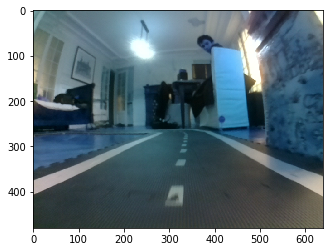

In [95]:
plt.imshow(imgrgb, interpolation='nearest')
plt.show()

In [103]:
crop_img = l[7]
crop_img = cv2.resize(crop_img, dsize=(32, 32), interpolation=cv2.INTER_NEAREST)
plt.imshow(crop_img, interpolation='nearest')
print(model.predict(preprocess_input(crop_img.astype(float)).reshape((1, 32, 32, 3))))
plt.show()

IndexError: list index out of range

In [105]:
model.save('sign_classification.h5')